In [1]:
### Importing Python libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data  = pd.read_csv('udemy_courses.csv')
data.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [3]:
data.dtypes

course_id                int64
course_title            object
url                     object
is_paid                   bool
price                    int64
num_subscribers          int64
num_reviews              int64
num_lectures             int64
level                   object
content_duration       float64
published_timestamp     object
subject                 object
dtype: object

In [4]:
data['published_timestamp'] = pd.to_datetime(data['published_timestamp'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   course_id            3678 non-null   int64              
 1   course_title         3678 non-null   object             
 2   url                  3678 non-null   object             
 3   is_paid              3678 non-null   bool               
 4   price                3678 non-null   int64              
 5   num_subscribers      3678 non-null   int64              
 6   num_reviews          3678 non-null   int64              
 7   num_lectures         3678 non-null   int64              
 8   level                3678 non-null   object             
 9   content_duration     3678 non-null   float64            
 10  published_timestamp  3678 non-null   datetime64[ns, UTC]
 11  subject              3678 non-null   object             
dtypes: bool(1), datetime

In [5]:
data.isnull().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [6]:
data.shape

(3678, 12)

In [7]:
duplicate_data = data.duplicated().any()
print('Are there any duplicate value in data ?', duplicate_data)

Are there any duplicate value in data ? True


In [8]:
data.drop_duplicates(inplace=True)

In [9]:
duplicate_data = data.duplicated().any()
print('Are there any duplicate value in data ?', duplicate_data)

Are there any duplicate value in data ? False


subject
Web Development        1199
Business Finance       1191
Musical Instruments     680
Graphic Design          602
Name: count, dtype: int64

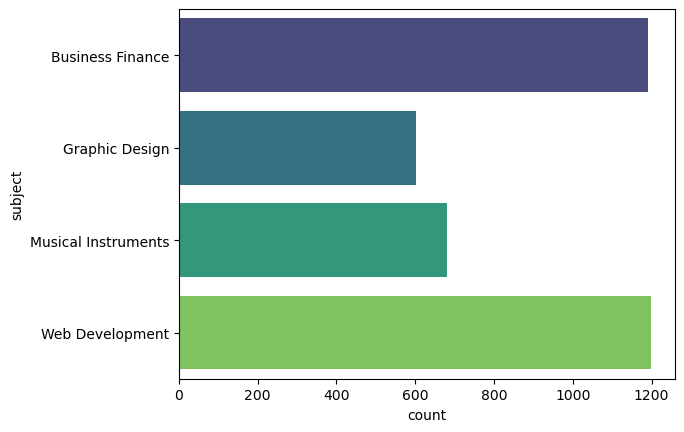

In [10]:
sns.countplot(y = 'subject', hue = 'subject', data = data, palette = 'viridis')
data['subject'].value_counts()

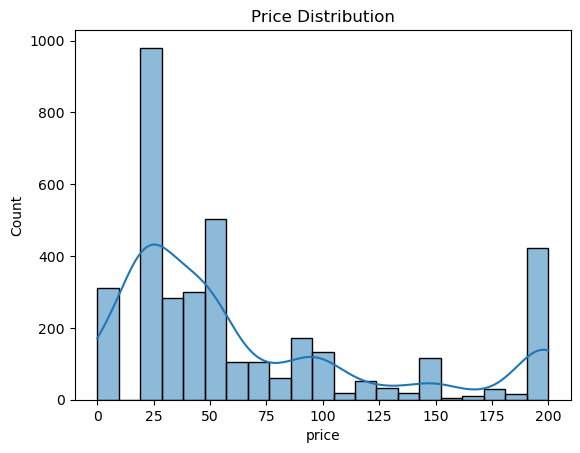

In [11]:
sns.histplot(data['price'], kde=True)
plt.title('Price Distribution')
plt.show()

level
All Levels            1925
Beginner Level        1268
Intermediate Level     421
Expert Level            58
Name: count, dtype: int64

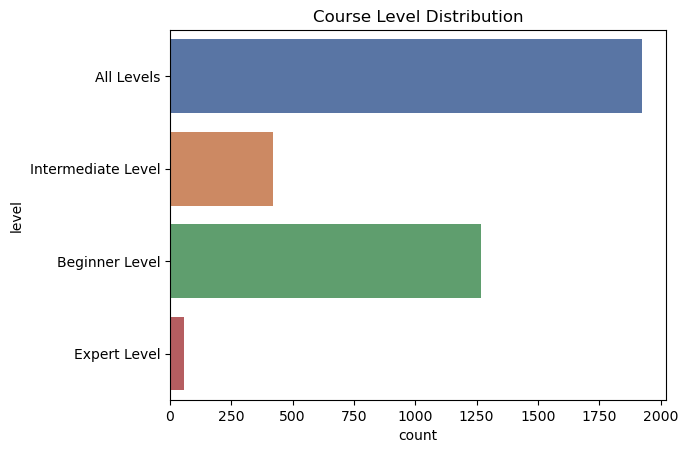

In [12]:
count = sns.countplot(data['level'], palette = 'deep',)
plt.title('Course Level Distribution')
data['level'].value_counts()

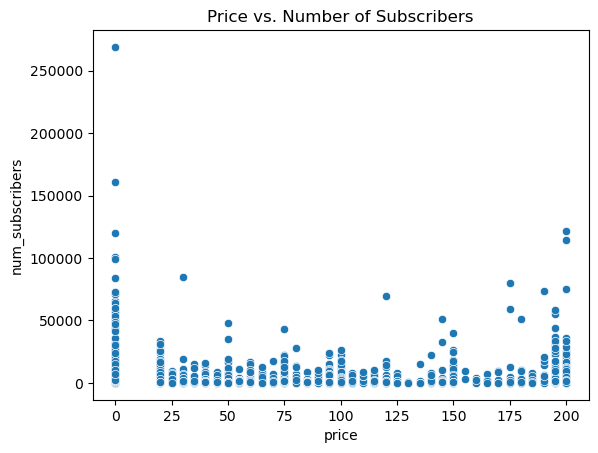

In [13]:
sns.scatterplot(x='price', y='num_subscribers', data=data)
plt.title('Price vs. Number of Subscribers')
plt.show()

In [14]:
# Create new features like price_per_hour, lectures_per_hour, reviews_per_subscriber
data['price_per_hour'] = data['price'] / data['content_duration']
data['lectures_per_hour'] = data['num_lectures'] / data['content_duration']
data['reviews_per_subscriber'] = data['num_reviews'] / data['num_subscribers']
data.head(1)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,price_per_hour,lectures_per_hour,reviews_per_subscriber
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance,133.333333,34.0,0.010713


In [15]:
df = pd.DataFrame(data)

# One-hot encode the 'subject' and 'level' columns
df_encoded = pd.get_dummies(df, columns=['subject', 'level'])

# Show the resulting DataFrame
df_encoded.head(1)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,content_duration,published_timestamp,...,lectures_per_hour,reviews_per_subscriber,subject_Business Finance,subject_Graphic Design,subject_Musical Instruments,subject_Web Development,level_All Levels,level_Beginner Level,level_Expert Level,level_Intermediate Level
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,1.5,2017-01-18 20:58:58+00:00,...,34.0,0.010713,True,False,False,False,True,False,False,False


In [16]:
columns_to_drop = ['course_id', 'course_title', 'url', 'published_timestamp']

df_cleaned = df_encoded.drop(columns=columns_to_drop)

# Show the resulting DataFrame
print(df_cleaned.head())

   is_paid  price  num_subscribers  num_reviews  num_lectures  \
0     True    200             2147           23            51   
1     True     75             2792          923           274   
2     True     45             2174           74            51   
3     True     95             2451           11            36   
4     True    200             1276           45            26   

   content_duration  price_per_hour  lectures_per_hour  \
0               1.5      133.333333          34.000000   
1              39.0        1.923077           7.025641   
2               2.5       18.000000          20.400000   
3               3.0       31.666667          12.000000   
4               2.0      100.000000          13.000000   

   reviews_per_subscriber  subject_Business Finance  subject_Graphic Design  \
0                0.010713                      True                   False   
1                0.330587                      True                   False   
2                0.0340

In [17]:
# Filling missing values with the mean for numerical columns
df_cleaned['lectures_per_hour'].fillna(df_cleaned['lectures_per_hour'].mean(), inplace=True)
df_cleaned['reviews_per_subscriber'].fillna(df_cleaned['reviews_per_subscriber'].mean(), inplace=True)

# Check if there are still any missing values
print(df_cleaned.isnull().sum())

is_paid                        0
price                          0
num_subscribers                0
num_reviews                    0
num_lectures                   0
content_duration               0
price_per_hour                 0
lectures_per_hour              0
reviews_per_subscriber         0
subject_Business Finance       0
subject_Graphic Design         0
subject_Musical Instruments    0
subject_Web Development        0
level_All Levels               0
level_Beginner Level           0
level_Expert Level             0
level_Intermediate Level       0
dtype: int64


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
# from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler

In [19]:
# Step 1: Replace infinite values with NaN
df_cleaned.replace([np.inf, -np.inf], np.nan, inplace=True)

# Step 2: Fill missing values
df_cleaned['lectures_per_hour'].fillna(df_cleaned['lectures_per_hour'].mean(), inplace=True)
df_cleaned['reviews_per_subscriber'].fillna(df_cleaned['reviews_per_subscriber'].mean(), inplace=True)

# Step 3: Check for any remaining NaN values
print(df_cleaned.isnull().sum())

is_paid                        0
price                          0
num_subscribers                0
num_reviews                    0
num_lectures                   0
content_duration               0
price_per_hour                 1
lectures_per_hour              0
reviews_per_subscriber         0
subject_Business Finance       0
subject_Graphic Design         0
subject_Musical Instruments    0
subject_Web Development        0
level_All Levels               0
level_Beginner Level           0
level_Expert Level             0
level_Intermediate Level       0
dtype: int64


In [20]:
# Optional: Cap large values (if necessary)
# Example: Set a cap at a reasonable threshold for content_duration
max_content_duration = df_cleaned['content_duration'].quantile(0.99)  # 99th percentile
df_cleaned['content_duration'] = np.where(df_cleaned['content_duration'] > max_content_duration, max_content_duration, df_cleaned['content_duration'])

# Step 4: Splitting the data into features (X) and target (y)
X = df_cleaned.drop('price', axis=1)  # Features
y = df_cleaned['price']  # Target

In [21]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle NaN and infinite values
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

In [22]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define algorithms to try
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Regression': SVR(),
    # 'XGBoost': XGBRegressor()
}

# Train and evaluate models
results = {}

In [23]:

for model_name, model in models.items():
    # Fit the model
    model.fit(X_train_scaled, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test_scaled)
    
    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results[model_name] = {
        'MAE': mae,
        'MSE': mse,
        'R-squared': r2
    }

In [24]:
# Convert results to DataFrame for comparison
results_df = pd.DataFrame(results).T
print(results_df)

# Find the best model
best_model_name = results_df['R-squared'].idxmax()
best_model_metrics = results_df.loc[best_model_name]

print(f"Best model: {best_model_name}")

                                 MAE          MSE  R-squared
Linear Regression          27.494875  1544.672795   0.579756
Ridge Regression           27.469398  1544.730984   0.579740
Lasso Regression           27.648252  1552.895036   0.577519
Random Forest               1.728095    19.389765   0.994725
Gradient Boosting           4.227415    40.226004   0.989056
Support Vector Regression  30.143527  2317.318822   0.369550
Best model: Random Forest


In [25]:
print(best_model_metrics)

MAE           1.728095
MSE          19.389765
R-squared     0.994725
Name: Random Forest, dtype: float64


In [26]:
X_train.head()

,is_paid,num_subscribers,num_reviews,num_lectures,content_duration,price_per_hour,lectures_per_hour,reviews_per_subscriber,subject_Business Finance,subject_Graphic Design,subject_Musical Instruments,subject_Web Development,level_All Levels,level_Beginner Level,level_Expert Level,level_Intermediate Level
981,True,152,6,14,3.5,14.285714,4.000000,0.039474,True,False,False,False,False,False,True,False
1150,True,829,78,50,8.5,4.705882,5.882353,0.094089,True,False,False,False,False,True,False,False
3549,True,654,86,239,25.5,3.725490,9.372549,0.131498,False,False,False,True,False,False,False,True
3474,True,1098,15,54,2.5,8.000000,21.600000,0.013661,False,False,False,True,True,False,False,False
2499,True,1502,218,49,6.0,6.666667,8.166667,0.145140,False,False,False,True,True,False,False,False


In [27]:
y_train

981      50
1150     40
3549     95
3474     20
2499     40
       ... 
1134    115
1298      0
862      30
3513      0
3180    200
Name: price, Length: 2937, dtype: int64

In [28]:
# Initialize and fit the model
rf_model = RandomForestRegressor(n_estimators=50, max_depth=20, max_features='sqrt', random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=50,
                      random_state=42)

In [29]:
# Make predictions
y_pred_final = rf_model.predict(X_test)
y_pred_final

array([ 38.2       ,  26.6       ,  24.        ,  56.9       ,
       165.8       ,  22.7       ,  24.6       , 116.4       ,
        74.4       ,  49.5       ,  22.        ,  94.2       ,
       107.7       , 113.9       ,  28.8       ,  44.13333333,
        46.9197861 ,  38.8       ,  29.8       ,  50.8       ,
       135.7       ,   4.8       , 149.4       ,  82.75555556,
       156.8       ,  25.9       ,  30.4       ,  24.83333333,
        45.3       ,  45.        ,  55.9       ,  22.96666667,
        20.9       ,  32.7       ,  32.7       ,  39.3       ,
       119.        ,  52.7       , 134.4       ,  88.05      ,
        61.575     ,  26.45      ,  49.14705882,   0.        ,
       148.3       ,   0.        , 164.8       , 147.6       ,
       127.3       ,  50.14285714,  32.        , 181.8       ,
       108.4       ,  65.9       ,  21.50666667, 186.54      ,
        21.7       ,  38.        ,  49.9       ,  41.25263158,
        35.1       ,  26.9       ,  38.6       , 155.7 

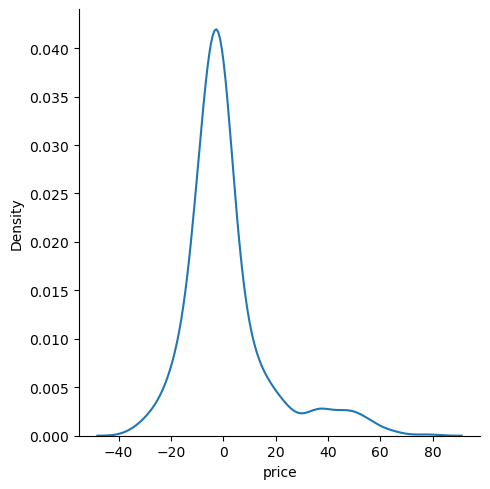

In [30]:
sns.displot(y_test- y_pred_final, kind = 'kde') # Kernel Density Estimate (KDE)
plt.show()

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae_final = mean_absolute_error(y_test, y_pred_final)
mse_final = mean_squared_error(y_test, y_pred_final)
r2_final = r2_score(y_test, y_pred_final)

print(f'Final Model MAE: {mae_final}')
print(f'Final Model MSE: {mse_final}')
print(f'Final Model R-squared: {r2_final}')

Final Model MAE: 10.5999272151944
Final Model MSE: 268.80345246298
Final Model R-squared: 0.9268692791310887


In [32]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets (80% train, 20% validation)
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you can fit the model on X_train and y_train
rf_model.fit(X_train, y_train)

# Make predictions on the validation data
y_pred_validation = rf_model.predict(X_validation)

# Print the predictions
print(y_pred_validation)

# Evaluate the predictions
mae_validation = mean_absolute_error(y_validation, y_pred_validation)
mse_validation = mean_squared_error(y_validation, y_pred_validation)
r_squared_validation = r2_score(y_validation, y_pred_validation)

[ 35.4         23.          24.          59.5        166.6
  22.9         24.7        116.4         77.          51.8
  21.8         94.1        113.1        114.          28.8
  43.13333333  48.3197861   37.4         30.1         50.7
 138.6          4.1        148.          87.35555556 155.9
  25.8         30.9         25.33333333  44.4         45.2
  54.          22.76666667  20.9         31.6         32.7
  40.         117.1         52.4        130.9         87.95
  61.775       25.15        48.24705882   0.         149.8
   0.         163.5        147.1        127.          52.64285714
  34.2        182.         112.2         62.9         21.50666667
 185.54        21.7         37.7         48.6         41.25263158
  35.4         27.1         38.8        158.1         26.4
  87.6        193.         103.9         44.09        33.3
  26.5         88.8         46.2          0.          54.6
   1.8        130.6          0.          69.83888889  54.5
  31.1         44.3         29.4  

In [33]:
# Print the evaluation metrics
print(f'Mean Absolute Error (MAE) on Validation Data: {mae_validation}')
print(f'Mean Squared Error (MSE) on Validation Data: {mse_validation}')
print(f'R-squared (R²) on Validation Data: {r_squared_validation}')

Mean Absolute Error (MAE) on Validation Data: 10.513995835916084
Mean Squared Error (MSE) on Validation Data: 263.4244642714977
R-squared (R²) on Validation Data: 0.9283326877308821


In [34]:
import pandas as pd

feature_importances = rf_model.feature_importances_
features = X_train.columns  # assuming X_train is a DataFrame
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

print(importance_df)

                        Feature  Importance
5                price_per_hour    0.462455
4              content_duration    0.169730
3                  num_lectures    0.120185
1               num_subscribers    0.046978
0                       is_paid    0.045420
2                   num_reviews    0.045107
6             lectures_per_hour    0.042916
7        reviews_per_subscriber    0.031701
11      subject_Web Development    0.008156
10  subject_Musical Instruments    0.006337
13         level_Beginner Level    0.005175
12             level_All Levels    0.005026
8      subject_Business Finance    0.004072
9        subject_Graphic Design    0.003097
15     level_Intermediate Level    0.002429
14           level_Expert Level    0.001215


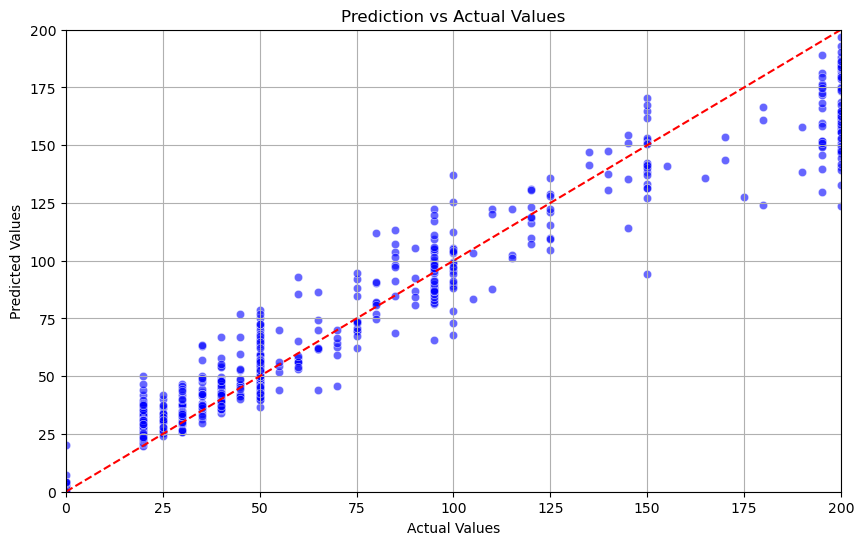

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting Prediction vs Actual
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_validation, y=y_pred_validation, color='blue', alpha=0.6)
plt.plot([min(y_validation), max(y_validation)], [min(y_validation), max(y_validation)], color='red', linestyle='--')
plt.title('Prediction vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.xlim(min(y_validation), max(y_validation))
plt.ylim(min(y_validation), max(y_validation))
plt.grid()
plt.show()

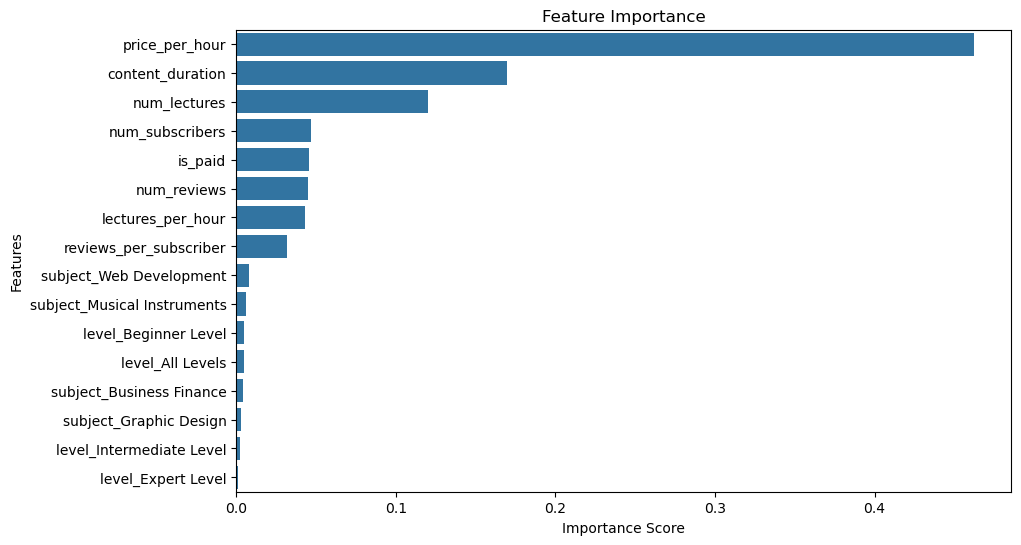

In [36]:
# Plotting Feature Importance
plt.figure(figsize=(10, 6))
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [37]:
# Check for infinite values
print(X.isin([np.inf, -np.inf]).sum())

# Check for very large values (e.g., greater than a threshold)
print((X > 1e10).sum())  # You can adjust the threshold as needed

is_paid                        0
num_subscribers                0
num_reviews                    0
num_lectures                   0
content_duration               0
price_per_hour                 0
lectures_per_hour              0
reviews_per_subscriber         0
subject_Business Finance       0
subject_Graphic Design         0
subject_Musical Instruments    0
subject_Web Development        0
level_All Levels               0
level_Beginner Level           0
level_Expert Level             0
level_Intermediate Level       0
dtype: int64
is_paid                        0
num_subscribers                0
num_reviews                    0
num_lectures                   0
content_duration               0
price_per_hour                 0
lectures_per_hour              0
reviews_per_subscriber         0
subject_Business Finance       0
subject_Graphic Design         0
subject_Musical Instruments    0
subject_Web Development        0
level_All Levels               0
level_Beginner Level          

In [38]:
# Step 1: Replace infinite values with NaN in the 'price_per_hour' column
X['price_per_hour'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Step 2: Drop rows where 'price_per_hour' is NaN
X.dropna(subset=['price_per_hour'], inplace=True)

# Display the cleaned DataFrame
print(X)

      is_paid  num_subscribers  num_reviews  num_lectures  content_duration  \
0        True             2147           23            51             1.500   
1        True             2792          923           274            30.645   
2        True             2174           74            51             2.500   
3        True             2451           11            36             3.000   
4        True             1276           45            26             2.000   
...       ...              ...          ...           ...               ...   
3673     True             1040           14            21             2.000   
3674     True              306            3            42             3.500   
3675     True              513          169            48             3.500   
3676     True              300           31            38             3.000   
3677     True              901           36            20             2.000   

      price_per_hour  lectures_per_hour  reviews_pe

In [39]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Handle infinite values by replacing them with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values in the selected features
data.dropna(subset=[
    'price_per_hour',
    'content_duration',
    'num_lectures'
], inplace=True)

# Select important features
selected_features = [
    'price_per_hour',
    'content_duration',
    'num_lectures'
]

# Create new DataFrame with selected features and target variable
X = data[selected_features]
y = data['price']

# Split the data into training and validation sets
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)

# Check for infinite values again before fitting the model
print("Is there any infinite value in X_train?", np.isinf(X_train).sum().sum() > 0)
print("Is there any infinite value in X_validation?", np.isinf(X_validation).sum().sum() > 0)

Is there any infinite value in X_train? False
Is there any infinite value in X_validation? False


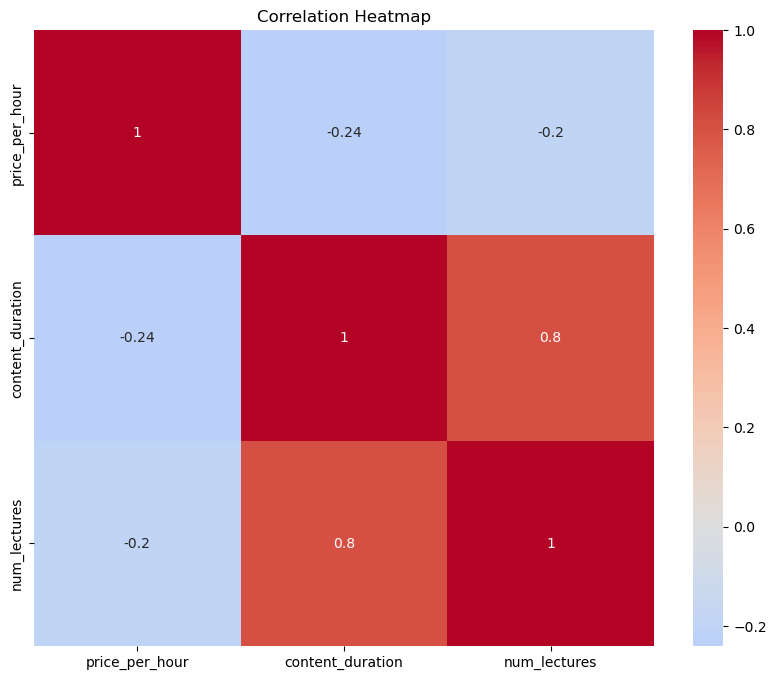

In [40]:
# Create a correlation matrix
corr_matrix = data[selected_features].corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [41]:
# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=50, max_depth=20, max_features='sqrt', random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on validation data
y_pred_validation = rf_model.predict(X_validation)

# Calculate metrics
mae = mean_absolute_error(y_validation, y_pred_validation)
mse = mean_squared_error(y_validation, y_pred_validation)
r_squared = r2_score(y_validation, y_pred_validation)

# Display metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r_squared)

Mean Absolute Error (MAE): 4.5226551415326925
Mean Squared Error (MSE): 66.82693329461816
R-squared (R²): 0.9818931021360464


In [42]:
# Function to simulate pricing scenarios
def simulate_pricing_scenarios(model, price_range, lecture_range, duration_range):
    results = []

    for price in price_range:
        for lectures in lecture_range:
            for duration in duration_range:
                # Create a new DataFrame for predictions with the correct order of features
                input_data = pd.DataFrame({
                    'price_per_hour': [price],
                    'num_lectures': [lectures],
                    'content_duration': [duration],
                    'num_subscribers': [0],  # Assuming you want to keep it constant or set it to 0
                    'is_paid': [1],           # Assuming the course is paid
                    'num_reviews': [0],       # You can adjust this value as needed
                    'lectures_per_hour': [lectures / duration]  # Example calculation for lectures per hour
                })

                # Ensure that the order of columns matches the training set
                input_data = input_data[selected_features]  # Use the same features used during training

                # Predict using the model
                predicted_price = model.predict(input_data)[0]
                revenue = predicted_price * lectures  # Revenue is the predicted price multiplied by number of lectures
                results.append((price, lectures, duration, predicted_price, revenue))

    return pd.DataFrame(results, columns=['price_per_hour', 'num_lectures', 'content_duration', 'predicted_price', 'revenue'])

Optimal Pricing Scenario:
price_per_hour        80.0
num_lectures          46.0
content_duration       3.5
predicted_price      199.3
revenue             9167.8
Name: 3345, dtype: float64


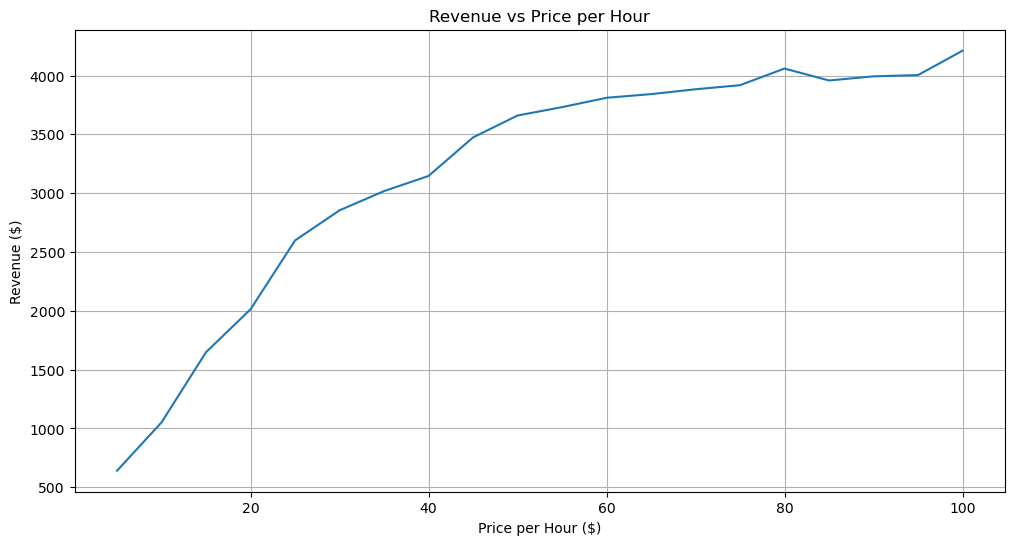

In [43]:
# Define ranges for simulation
price_range = np.arange(5, 101, 5)  # Price from $5 to $100
lecture_range = np.arange(1, 51, 5)  # Number of lectures from 1 to 50
duration_range = np.arange(0.5, 11, 0.5)  # Duration from 0.5 to 10 hours

# Run simulation
results_df = simulate_pricing_scenarios(rf_model, price_range, lecture_range, duration_range)

# Find optimal price points based on revenue
optimal_price = results_df.loc[results_df['revenue'].idxmax()]
print("Optimal Pricing Scenario:")
print(optimal_price)

# Visualize the results
plt.figure(figsize=(12, 6))
sns.lineplot(data=results_df, x='price_per_hour', y='revenue', ci=None)
plt.title('Revenue vs Price per Hour')
plt.xlabel('Price per Hour ($)')
plt.ylabel('Revenue ($)')
plt.grid()
plt.show()

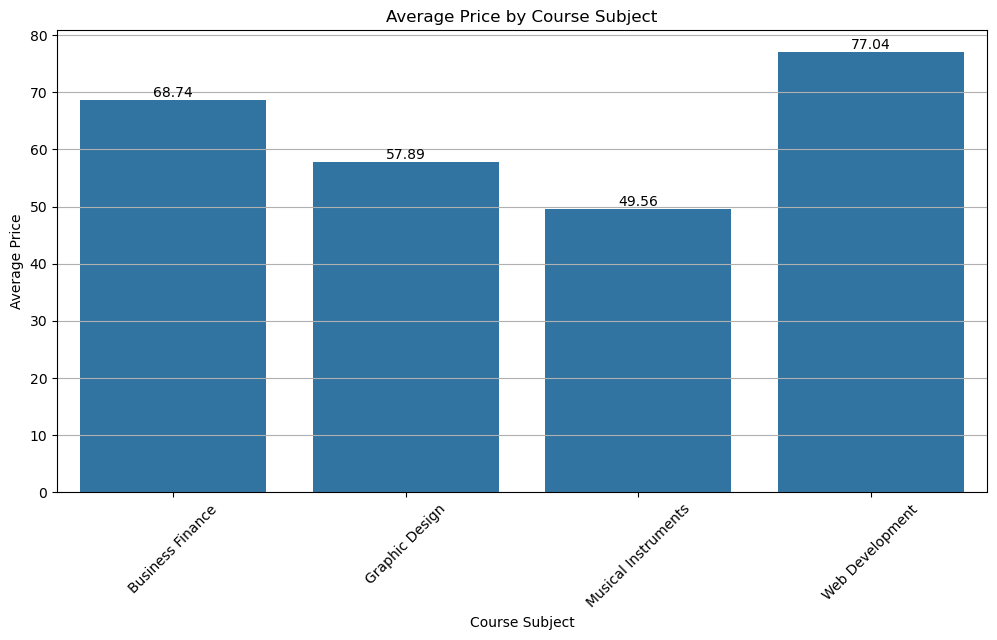

In [44]:
# Segment the dataset by course category (e.g., subject)
segments = data.groupby('subject').agg({
    'price': 'mean',
    'num_subscribers': 'mean',
    'num_reviews': 'mean'
}).reset_index()

# Visualize the segments
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=segments, x='subject', y='price')

# Annotate the bars with the mean price values
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.2f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='center', 
                      fontsize=10, color='black', 
                      xytext=(0, 5),  # 5 points vertical offset
                      textcoords='offset points')

plt.title('Average Price by Course Subject')
plt.xlabel('Course Subject')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(axis='y')  # Optional: add gridlines for better readability
plt.show()

In [45]:
from sklearn.model_selection import cross_val_score

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=50, max_depth=20, max_features='sqrt', random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_absolute_error')
mean_cv_score = -cv_scores.mean()

print(f"Mean CV MAE: {mean_cv_score:.2f}")

Mean CV MAE: 4.53
